<a href="https://colab.research.google.com/github/SanketDevmunde/NLP_ASSIGNMENT/blob/main/NLP_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install transformers torch pandas matplotlib

import pandas as pd
import torch
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from torch.nn.functional import softmax

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
# Load a pre-trained transformer model for sentiment analysis
MODEL_NAME = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

def sentiment_analysis(text_list):
    """Performs sentiment analysis using a pre-trained transformer model."""
    results = []

    for text in text_list:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
        outputs = model(**inputs)
        probabilities = softmax(outputs.logits, dim=1).detach().numpy()[0]
        sentiment_score = probabilities.argmax() + 1  # Convert to a 1-5 scale
        results.append([text, sentiment_score])

    df = pd.DataFrame(results, columns=['Text', 'Sentiment Score'])
    return df


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
# Example text for analysis
texts = ["I love this product!", "It's okay, but could be better.", "Absolutely terrible experience."]


In [ ]:
# Perform sentiment analysis
df_sentiment = sentiment_analysis(texts)
df_sentiment

,Text,Sentiment Score
0,I love this product!,5
1,"It's okay, but could be better.",3
2,Absolutely terrible experience.,1


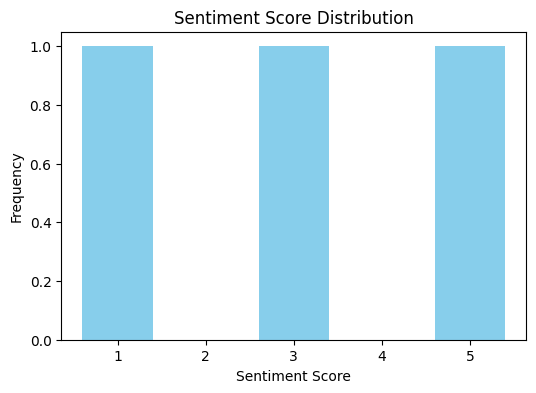

In [ ]:
# Visualization: Sentiment score distribution
def plot_sentiment_distribution(df):
    """Plots a bar chart of sentiment scores."""
    sentiment_counts = df['Sentiment Score'].value_counts().sort_index()

    plt.figure(figsize=(6, 4))
    plt.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue')
    plt.xlabel("Sentiment Score")
    plt.ylabel("Frequency")
    plt.title("Sentiment Score Distribution")
    plt.xticks(range(1, 6))
    plt.show()

plot_sentiment_distribution(df_sentiment)
